In [202]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
#import keras

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [203]:
data = np.load("menu-match.npz")
x_train = data["X_train"]
x_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

'''x_train = data["X_train"] / 48.0
x_test = data["X_test"] / 48.0
y_train = data["y_train"].flatten()
y_test = data["y_test"].flatten()'''

'x_train = data["X_train"] / 48.0\nx_test = data["X_test"] / 48.0\ny_train = data["y_train"].flatten()\ny_test = data["y_test"].flatten()'

In [206]:
def change_labels(labs):
    temp = list(labs)
    for i in range(len(temp)):
        if temp[i] == "a":
            temp[i] = 0
            
        else:
            temp[i] = 1
            
    return temp
    
y_train = np.array(change_labels(y_train))
y_test = np.array(change_labels(y_test))

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

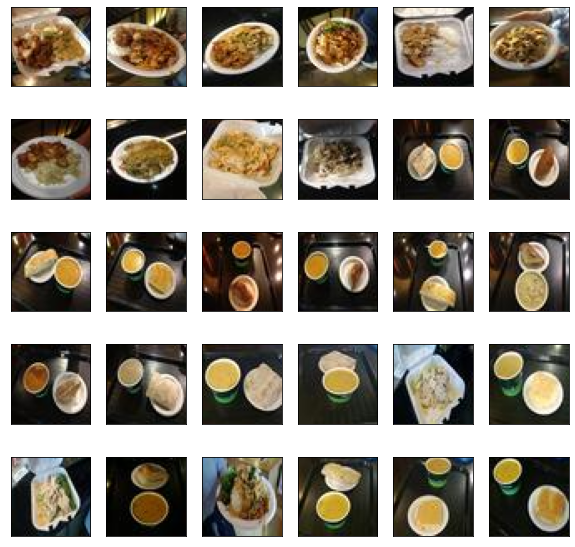

In [209]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    print(y_test[i], end = ", ")

plt.show()

In [210]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activatio = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
 
x = Dense(K, activation = 'softmax')(x)
 
model = Model(i, x)
model.summary()

number of classes: 2
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_60 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_61 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 2

In [211]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [212]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100)

Epoch 1/100


2022-06-03 11:00:37.715142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 4.0712 - accuracy: 0.6229

2022-06-03 11:00:39.862977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 4s 130ms/step - loss: 4.0712 - accuracy: 0.6229 - val_loss: 4.0452 - val_accuracy: 0.5663
Epoch 2/100
15/15 [==============================] - 1s 87ms/step - loss: 0.5536 - accuracy: 0.7938 - val_loss: 3.9279 - val_accuracy: 0.5783
Epoch 3/100
15/15 [==============================] - 1s 74ms/step - loss: 0.2098 - accuracy: 0.9208 - val_loss: 1.4215 - val_accuracy: 0.6084
Epoch 4/100
15/15 [==============================] - 1s 71ms/step - loss: 0.0955 - accuracy: 0.9708 - val_loss: 1.0131 - val_accuracy: 0.6205
Epoch 5/100
15/15 [==============================] - 1s 69ms/step - loss: 0.0550 - accuracy: 0.9917 - val_loss: 0.6925 - val_accuracy: 0.6386
Epoch 6/100
15/15 [==============================] - 1s 70ms/step - loss: 0.0328 - accuracy: 0.9833 - val_loss: 0.4974 - val_accuracy: 0.7711
Epoch 7/100
15/15 [==============================] - 1s 75ms/step - loss: 0.0184 - accuracy: 0.9979 - val_loss: 0.4482 - val_accuracy: 0.7651
Epoch 8/100
15/15

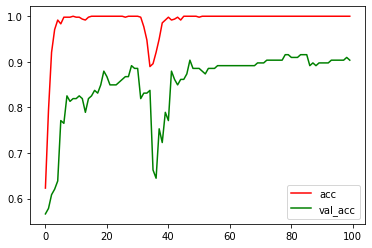

In [213]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [215]:
batch_size = 32
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100)

Epoch 1/100
15/15 [==============================] - 1s 69ms/step - loss: 0.1311 - accuracy: 0.9521 - val_loss: 0.7393 - val_accuracy: 0.7952
Epoch 2/100
15/15 [==============================] - 1s 74ms/step - loss: 0.0691 - accuracy: 0.9688 - val_loss: 0.4752 - val_accuracy: 0.8554
Epoch 3/100
15/15 [==============================] - 1s 67ms/step - loss: 0.0299 - accuracy: 0.9875 - val_loss: 0.7260 - val_accuracy: 0.8795
Epoch 4/100
15/15 [==============================] - 1s 70ms/step - loss: 0.0165 - accuracy: 0.9958 - val_loss: 0.3570 - val_accuracy: 0.9096
Epoch 5/100
15/15 [==============================] - 1s 78ms/step - loss: 0.0130 - accuracy: 0.9979 - val_loss: 0.7043 - val_accuracy: 0.8795
Epoch 6/100
15/15 [==============================] - 1s 71ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.5710 - val_accuracy: 0.9036
Epoch 7/100
15/15 [==============================] - 1s 69ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.5224 - val_accuracy: 0.9157
Epoch 

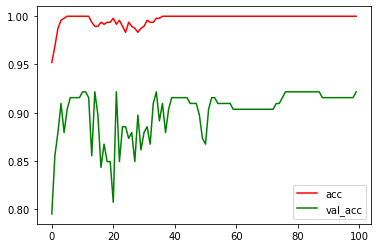

In [217]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [222]:
labels = list(map(str, set(y_train)))
for i in range(len(x_test)): 
    #plt.imshow(x_test[image_number])
    
    n = np.array(x_test[i])
    p = n.reshape(1, 48, 48, 3)

    predicted_label = labels[model.predict(p).argmax()]
    original_label = labels[y_test[i]]

    converter = {"0": "asian", "1": "non-asian", "2": "non-asian"}
    nbconverter = {"0": "asian", "1": "italian", "2": "soup"}
    print("Ground Truth is {} and Predicted is {}, and non-binarized predicted label is {}".format(converter[original_label], converter[predicted_label], nbconverter[predicted_label]))
    
    #plt.show()

Ground Truth is asian and Predicted is asian, and non-binarized predicted label is asian
Ground Truth is asian and Predicted is asian, and non-binarized predicted label is asian
Ground Truth is asian and Predicted is asian, and non-binarized predicted label is asian
Ground Truth is asian and Predicted is asian, and non-binarized predicted label is asian
Ground Truth is asian and Predicted is asian, and non-binarized predicted label is asian
Ground Truth is asian and Predicted is asian, and non-binarized predicted label is asian
Ground Truth is asian and Predicted is asian, and non-binarized predicted label is asian
Ground Truth is asian and Predicted is asian, and non-binarized predicted label is asian
Ground Truth is asian and Predicted is non-asian, and non-binarized predicted label is italian
Ground Truth is asian and Predicted is asian, and non-binarized predicted label is asian
Ground Truth is non-asian and Predicted is non-asian, and non-binarized predicted label is italian
Groun